In [2]:
import pygmt
import geopandas as gpd
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [14]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Get the column names for the table
column_names = inspector.get_columns('measurement')
for column_name in column_names:
    print(column_name["name"])

id
station
date
prcp
tobs


In [18]:
# Get the column names for the table
column_names = inspector.get_columns('station')
for column_name in column_names:
    print(column_name["name"])

id
station
name
latitude
longitude
elevation


In [17]:
measurement_data=session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
measurement_df=pd.DataFrame(measurement_data)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [19]:
stations_data = session.query(Station.id,
                                  Station.station,
                                  Station.name,
                                  Station.longitude,
                                  Station.latitude,
                                  Station.elevation
                                  ).all()


In [20]:
stations_df=pd.DataFrame(stations_data)
stations_df

,id,station,name,longitude,latitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,21.27160,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",-157.80150,21.42340,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,7.0
3,4,USC00517948,"PEARL CITY, HI US",-157.97510,21.39340,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",-158.01110,21.49920,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",-157.84889,21.45167,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,21.31520,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,152.4


In [22]:
station_master_df=measurement_df.merge(stations_df, how='left', on='station')
station_master_df

,id_x,station,date,prcp,tobs,id_y,name,longitude,latitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4


In [23]:
station_master_df['prcp']=station_master_df['prcp'].fillna(0)
station_master_df

,id_x,station,date,prcp,tobs,id_y,name,longitude,latitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
4,5,USC00519397,2010-01-06,0.00,73.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19546,19547,USC00516128,2017-08-20,0.00,78.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4


In [27]:
min_prcp = station_master_df['prcp'].min()
min_prcp
max_prcp = station_master_df['prcp'].max()
print(max_prcp)

11.53


In [48]:
summed_df=station_master_df.groupby(['station'])['prcp'].sum()
tot_prcp=list(summed_df)

In [49]:
stations_df["Total Precipitation"]=tot_prcp
stations_df

,id,station,name,longitude,latitude,elevation,Total Precipitation
0,1,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,21.27160,3.0,92.68
1,2,USC00513117,"KANEOHE 838.1, HI US",-157.80150,21.42340,14.6,382.62
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,7.0,234.49
3,4,USC00517948,"PEARL CITY, HI US",-157.97510,21.39340,11.9,1068.09
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",-158.01110,21.49920,306.6,43.44
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,19.5,70.87
6,7,USC00519281,"WAIHEE 837.5, HI US",-157.84889,21.45167,32.9,588.64
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,21.31520,0.9,131.62
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,152.4,295.68


In [11]:
#Get the station locations lat long
station_locations = session.query(Station.latitude, Station.longitude).all()
stations_locations_df=pd.DataFrame(station_locations)
stations_locations_df=stations_locations_df[['longitude', 'latitude']]
stations_locations_df

,longitude,latitude
0,-157.81680,21.27160
1,-157.80150,21.42340
2,-157.83740,21.52130
3,-157.97510,21.39340
4,-158.01110,21.49920
5,-157.71139,21.33556
6,-157.84889,21.45167
7,-157.99920,21.31520
8,-157.80250,21.33310


In [40]:
total_prcp = pd.Series(summed_df['prcp'])
print(len(total_prcp))

9


In [5]:
lon=stations_df.longitude
print(lon)
lat=stations_df.latitude
print(lat)

0   -157.81680
1   -157.80150
2   -157.83740
3   -157.97510
4   -158.01110
5   -157.71139
6   -157.84889
7   -157.99920
8   -157.80250
Name: longitude, dtype: float64
0    21.27160
1    21.42340
2    21.52130
3    21.39340
4    21.49920
5    21.33556
6    21.45167
7    21.31520
8    21.33310
Name: latitude, dtype: float64


In [42]:
# Creating a new DataFrame using both duration and count
precip_locations = pd.DataFrame({"Longitude": lon,
                                 "Latitude": lat,
                                 "Total_prpc" : total_prcp
                                })
precip_locations

,Longitude,Latitude,Total_prpc
0,-157.81680,21.27160,NaN
1,-157.80150,21.42340,NaN
2,-157.83740,21.52130,NaN
3,-157.97510,21.39340,NaN
4,-158.01110,21.49920,NaN
5,-157.71139,21.33556,NaN
6,-157.84889,21.45167,NaN
7,-157.99920,21.31520,NaN
8,-157.80250,21.33310,NaN
USC00511918,NaN,NaN,92.68


C:\Users\jonat\anaconda3\envs\GMT\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\jonat\anaconda3\envs\GMT\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\jonat\anaconda3\envs\GMT\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


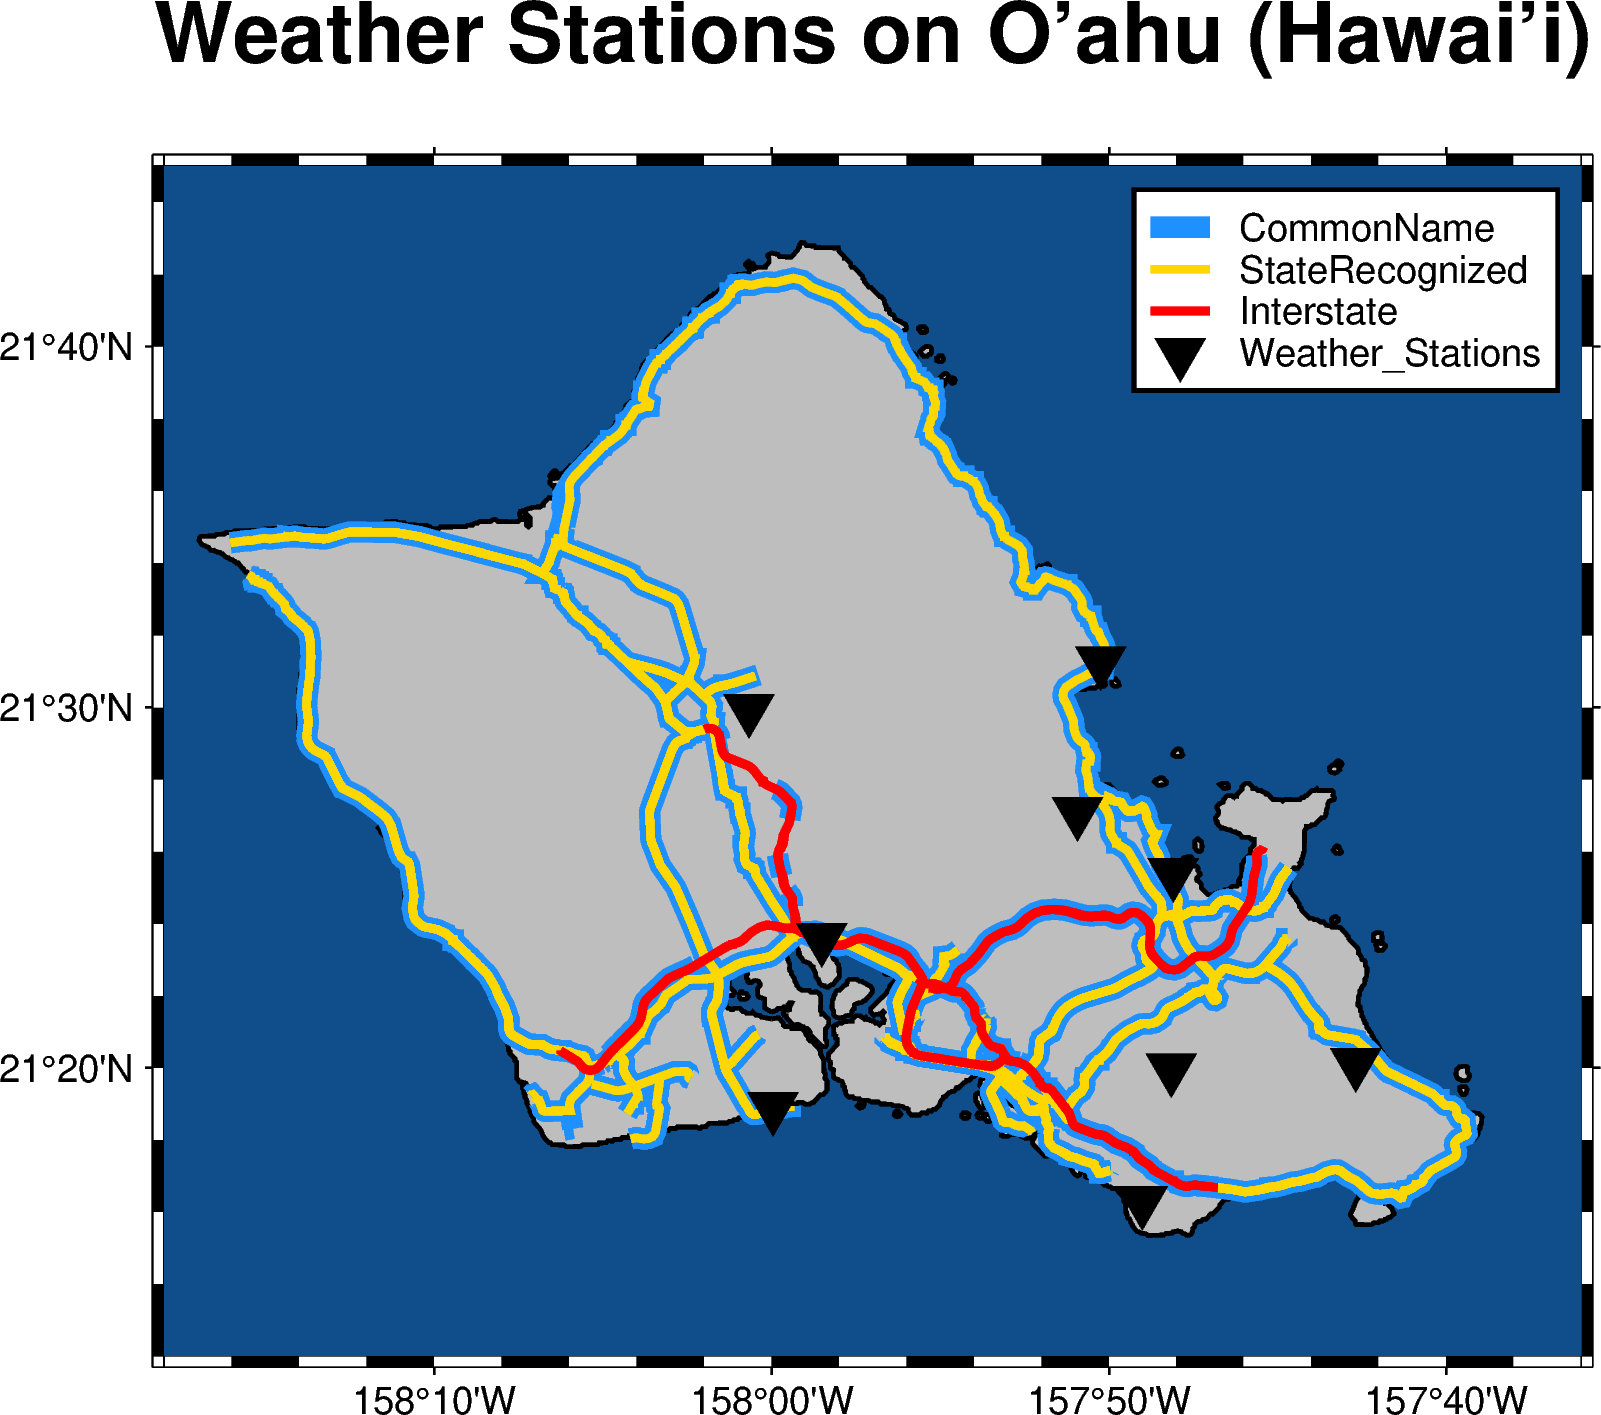

In [12]:
# Read shapefile data using geopandas
gdf = gpd.read_file(
    "http://www2.census.gov/geo/tiger/TIGER2015/PRISECROADS/tl_2015_15_prisecroads.zip"
)
# The dataset contains different road types listed in the RTTYP column,
# here we select the following ones to plot:
roads_common = gdf[gdf.RTTYP == "M"]  # Common name roads
roads_state = gdf[gdf.RTTYP == "S"]  # State recognized roads
roads_interstate = gdf[gdf.RTTYP == "I"]  # Interstate roads

fig = pygmt.Figure()

# Define target region around O'ahu (Hawai'i)
region = [-158.3, -157.6, 21.2, 21.75]  # xmin, xmax, ymin, ymax

title = r"Weather Stations on O\047ahu (Hawai\047i)"  # \047 is octal code for '

#Generate the base map which is the lat/long frame and an empt interior
#Use a mercator projection and set annotation properties around the frame
fig.basemap(region=region, projection="M12c", frame=["af", f'WSne+t"{title}"'])
fig.coast(land="gray", water="dodgerblue4", shorelines="1p,black")

# Plot the individual road types with different pen settings and assign labels
# which are displayed in the legend
fig.plot(data=roads_common, pen="5p,dodgerblue", label="CommonName")
fig.plot(data=roads_state, pen="2p,gold", label="StateRecognized")
fig.plot(data=roads_interstate, pen="2p,red", label="Interstate")

#Plot the locations of the weather stations
fig.plot(data=stations_df, style="i0.5c", color="black", label="Weather_Stations")

# Add legend
fig.legend()

fig.show()

In [53]:
stations_df

,id,station,name,longitude,latitude,elevation,Total Precipitation
0,1,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,21.27160,3.0,92.68
1,2,USC00513117,"KANEOHE 838.1, HI US",-157.80150,21.42340,14.6,382.62
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,7.0,234.49
3,4,USC00517948,"PEARL CITY, HI US",-157.97510,21.39340,11.9,1068.09
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",-158.01110,21.49920,306.6,43.44
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,19.5,70.87
6,7,USC00519281,"WAIHEE 837.5, HI US",-157.84889,21.45167,32.9,588.64
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,21.31520,0.9,131.62
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,152.4,295.68


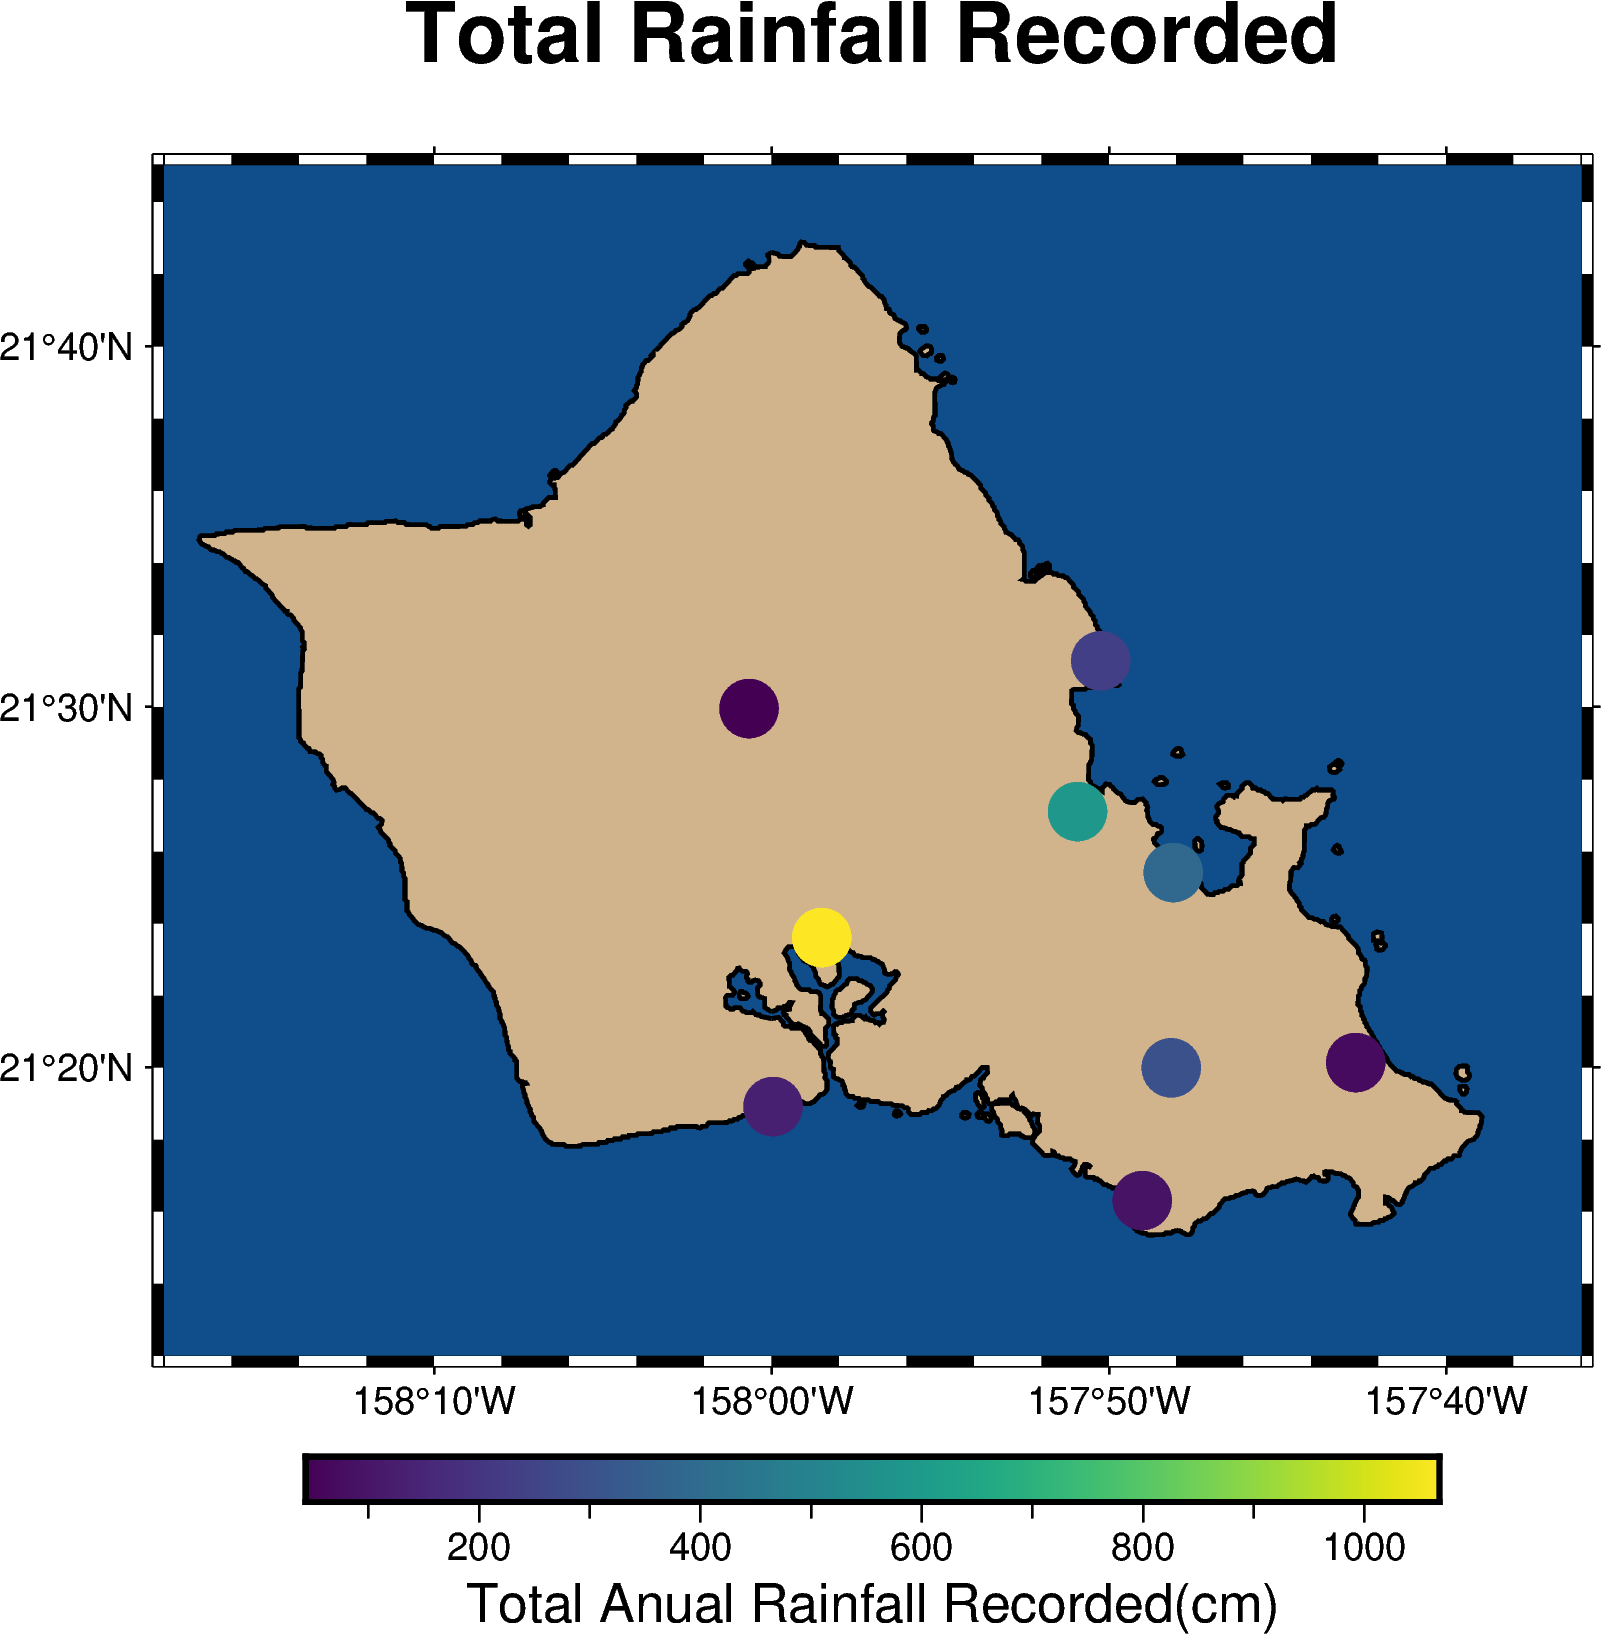

In [72]:
fig = pygmt.Figure()

region = [-158.3, -157.6, 21.2, 21.75]  # xmin, xmax, ymin, ymax

title = r"Total Rainfall Recorded"  # \047 is octal code for '

fig.basemap(region=region, projection="M12c", frame=["af", f'WSne+t"{title}"'])
fig.coast(land="tan", water="dodgerblue4", shorelines="1p,black")

pygmt.makecpt(cmap="viridis", series=[total_prcp.min(), total_prcp.max()])

fig.plot(x=stations_df.longitude, 
         y=stations_df.latitude, 
         style="c0.5c", 
         #color="black", 
         #label="Weather_Stations",
         color=stations_df["Total Precipitation"],
         cmap=True,
        )

fig.colorbar(frame='af+l"Total Anual Rainfall Recorded(cm)"')

fig.show()

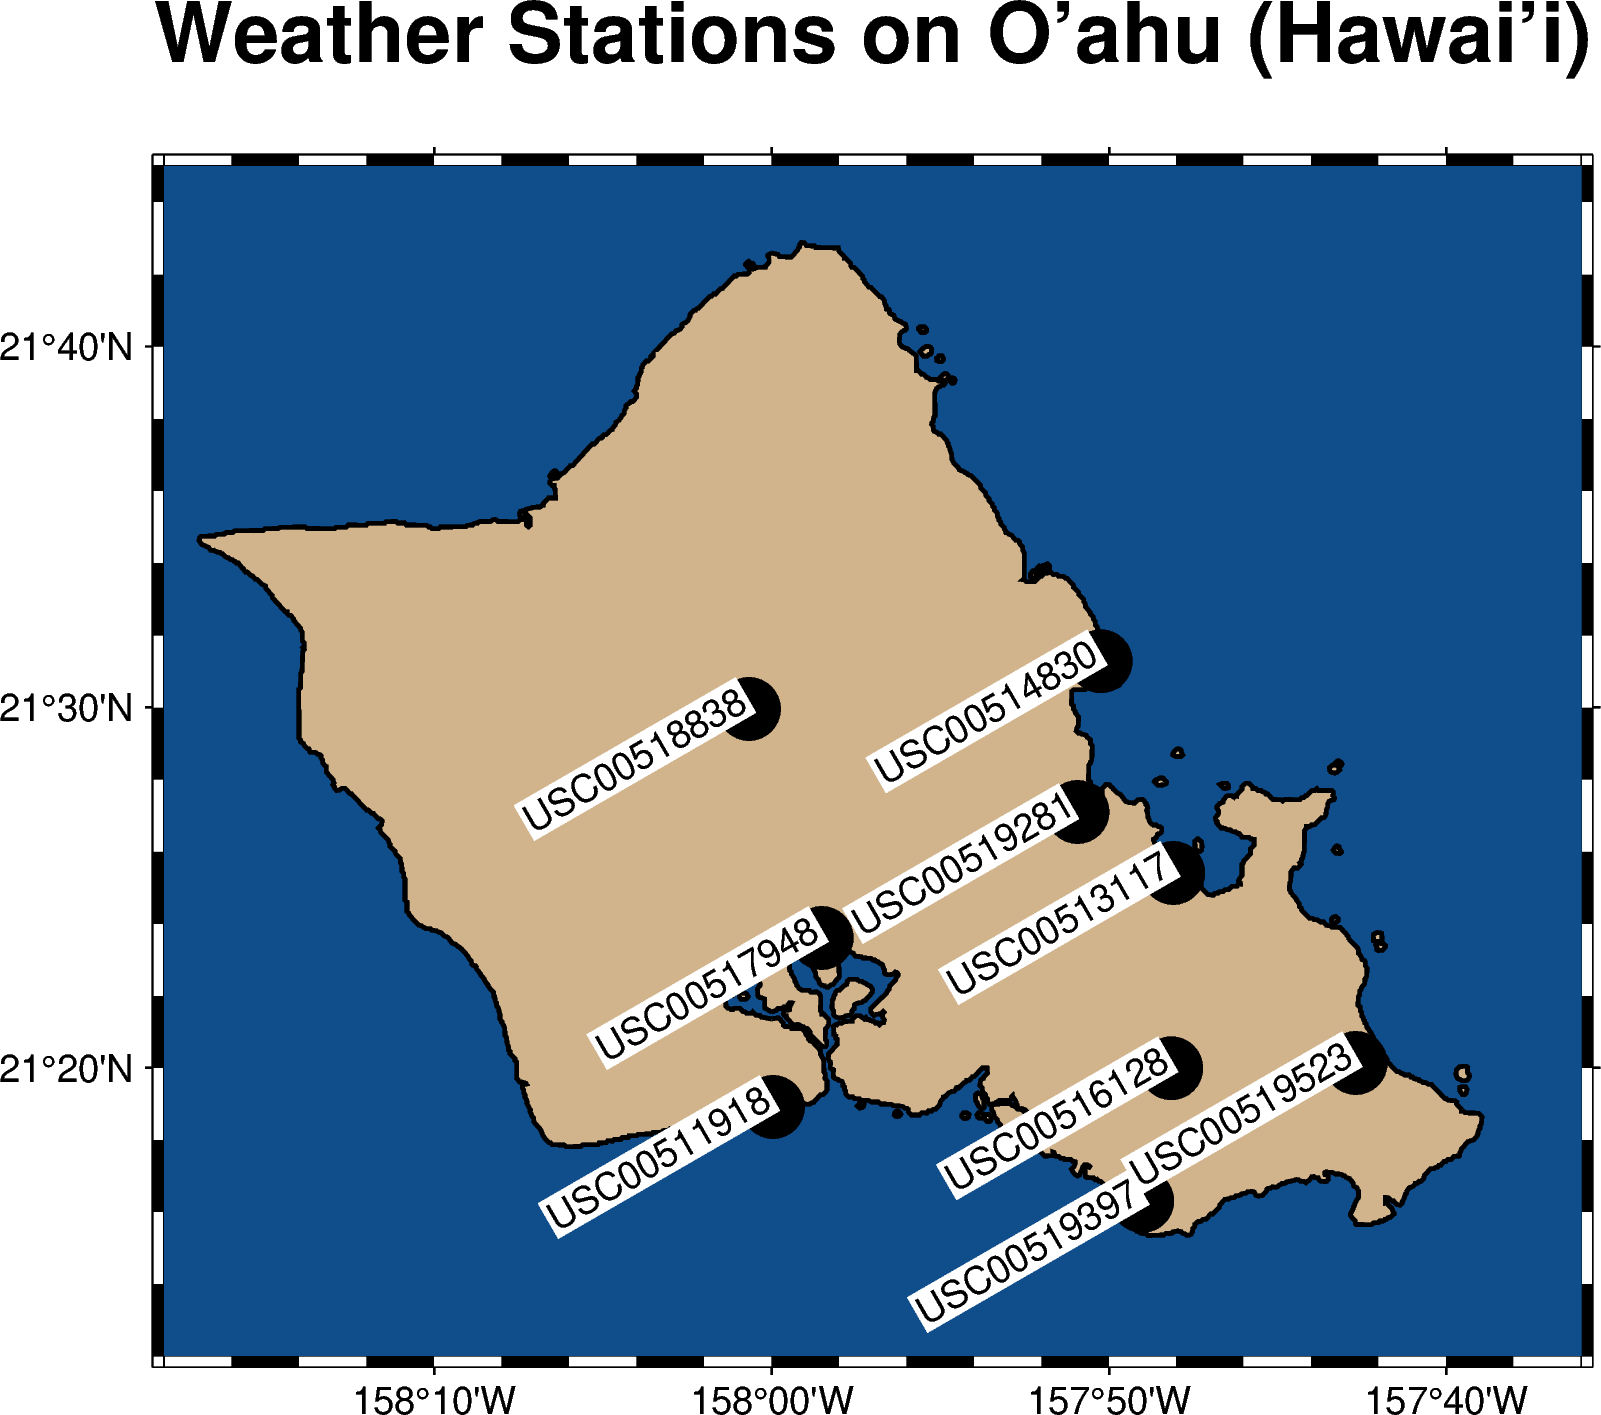

In [71]:
fig = pygmt.Figure()

region = [-158.3, -157.6, 21.2, 21.75]  # xmin, xmax, ymin, ymax

title = r"Weather Stations on O\047ahu (Hawai\047i)"  # \047 is octal code for '

fig.basemap(region=region, projection="M12c", frame=["af", f'WSne+t"{title}"'])
fig.coast(land="tan", water="dodgerblue4", shorelines="1p,black")

fig.plot(x=stations_df.longitude, 
         y=stations_df.latitude, 
         style="c0.5c", 
         color="black", 
         label="Weather_Stations",
         pen="1p"
        )

fig.text(text=stations_df.station, 
         x=stations_df.longitude, 
         y=stations_df.latitude, 
         fill="white", 
         angle=30,
         justify="BR"
        )


fig.show()